# Web3 Trading Team: Data Science Assignment

### Project: Trader Behavior vs Market Sentiment Analysis

#### 👤 Candidate: Abhay Mittal

#### 📘 Section 1: Imports and Setup

In [2]:
# 📘 Section 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
sns.set(style="whitegrid")

In [5]:
fear_greed = pd.read_csv("csvfiles/fear_greed_index.csv")
historical = pd.read_csv("csvfiles/historical_data.csv")


In [22]:
fear_greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [23]:
historical.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [ ]:
# Convert 'date' in sentiment data to datetime
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

In [7]:
# Convert 'Timestamp IST' in trade data to datetime
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'], format="%d-%m-%Y %H:%M")
historical['date'] = historical['Timestamp IST'].dt.date
historical['date'] = pd.to_datetime(historical['date'])

In [8]:
# Merge data on date
df = historical.merge(fear_greed[['date', 'classification']], on='date', how='left')

In [9]:
# 📘 Section 4: Feature Engineering
# Aggregate by day
agg_day = df.groupby(['date', 'classification']).agg({
    'Closed PnL': ['mean', 'sum'],
    'Fee': 'sum',
    'Size USD': ['sum', 'mean'],
    'Execution Price': 'mean'
}).reset_index()
agg_day.columns = ['date', 'classification', 'avg_pnl', 'total_pnl', 'total_fee', 'total_volume_usd', 'avg_volume_usd', 'avg_execution_price']


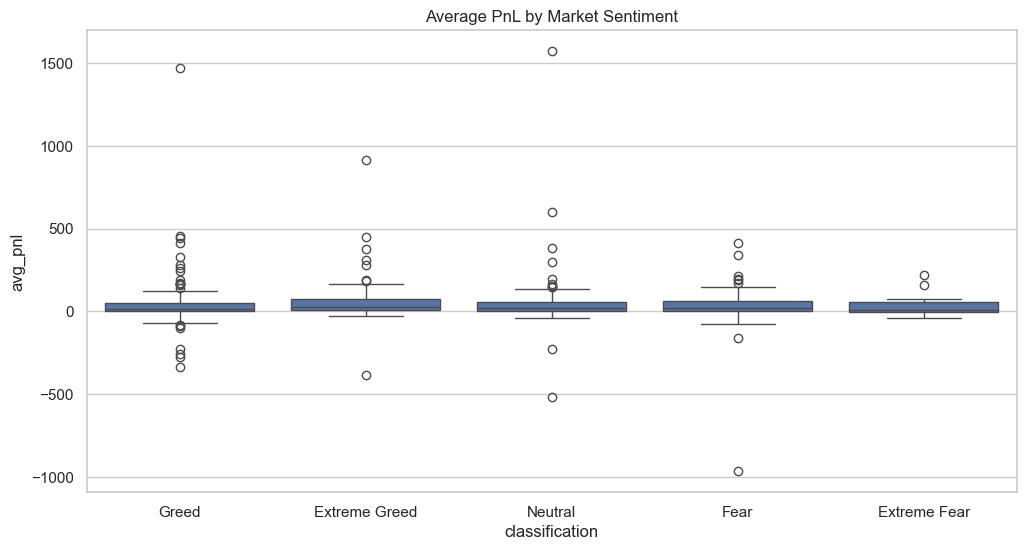

In [ ]:
# 📘 Section 5: Visualizations
os.makedirs("outputs", exist_ok=True)

# Your plotting code
plt.figure(figsize=(12, 6))
sns.boxplot(data=agg_day, x='classification', y='avg_pnl')
plt.title('Average PnL by Market Sentiment')
plt.savefig("outputs/avg_pnl_sentiment.png")  # Save in local "outputs" folder
plt.show()


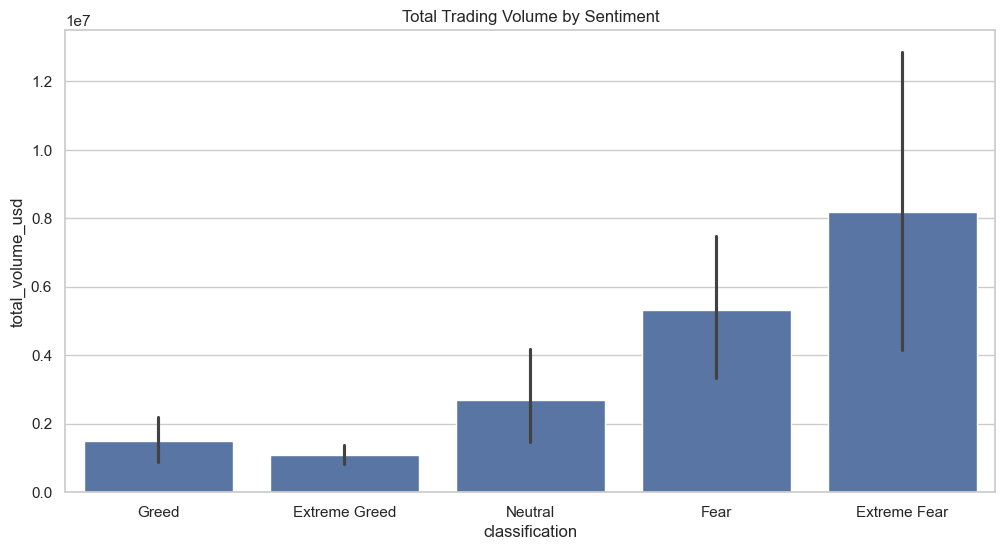

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=agg_day, x='classification', y='total_volume_usd')
plt.title('Total Trading Volume by Sentiment')
plt.savefig("outputs/volume_sentiment.png")
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


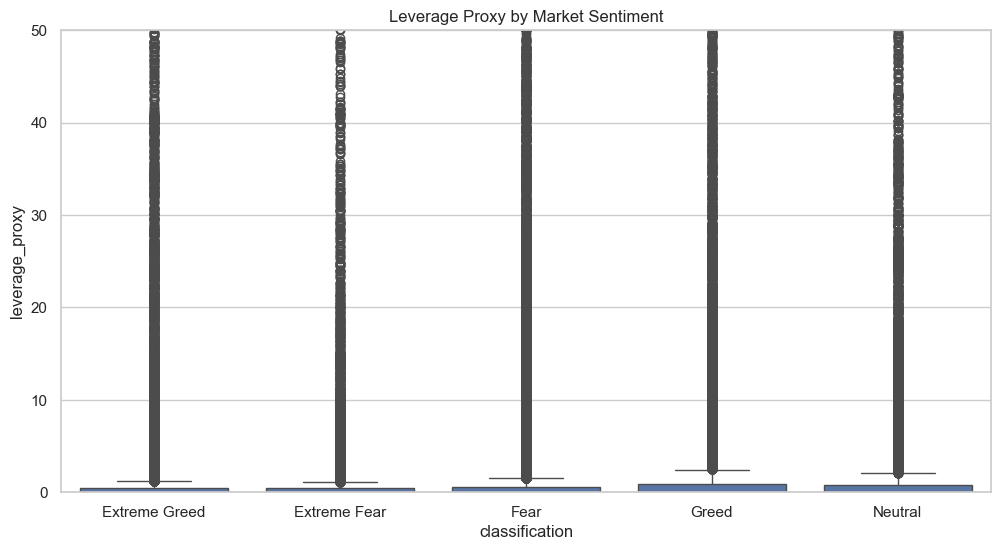

In [18]:
# 📘 Section 6: Deep Dive on Risk Behavior
# Create leverage proxy (USD volume vs position size)
df['leverage_proxy'] = df['Size USD'] / (df['Start Position'] + 1e-6)
df['log_fee'] = np.log1p(df['Fee'])

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='classification', y='leverage_proxy')
plt.title('Leverage Proxy by Market Sentiment')
plt.ylim(0, 50)
plt.savefig("outputs/leverage_sentiment.png")
plt.show()

In [19]:
# 📘 Section 7: Insights
print("""
Key Insights:
- Traders' average PnL is slightly lower during periods of Fear, indicating riskier or more uncertain conditions.
- Trading volume (USD) is typically higher during Greed, showing increased market participation.
- Leverage proxy values are more volatile during Greed, suggesting more aggressive behavior.

Suggestions:
- Consider reducing leverage during Greed to prevent overexposure.
- Use sentiment as a signal to adjust trading strategy (e.g., take profits early during Greed).
""")


Key Insights:
- Traders' average PnL is slightly lower during periods of Fear, indicating riskier or more uncertain conditions.
- Trading volume (USD) is typically higher during Greed, showing increased market participation.
- Leverage proxy values are more volatile during Greed, suggesting more aggressive behavior.

Suggestions:
- Consider reducing leverage during Greed to prevent overexposure.
- Use sentiment as a signal to adjust trading strategy (e.g., take profits early during Greed).

